# **ÍNDICE SHF DE PRECIOS DE LA VIVIENDA EN MÉXICO, PRIMER TRIMESTRE DE 2023**

Con información de Sociedad Hipotecaria Federal (SHF)
https://www.gob.mx/shf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

El archivo se puede descargar de la siguiente liga:

https://transparencia.shf.gob.mx/sitepages/IndicePV.aspx

In [3]:
df = pd.read_excel('SHF.xlsx')

In [4]:
df

,Consecutivo,Global,Estado,Municipio,Trimestre,Año,Indice,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Nacional,NaN,NaN,1,2005,48.47,NaN,NaN,NaN,NaN
1,2,Nueva,NaN,NaN,1,2005,48.20,NaN,NaN,NaN,NaN
2,3,Usada,NaN,NaN,1,2005,48.76,NaN,NaN,NaN,NaN
3,4,Casa sola,NaN,NaN,1,2005,49.08,NaN,NaN,NaN,NaN
4,5,Casa en condominio - depto.,NaN,NaN,1,2005,47.79,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8949,8950,NaN,Veracruz,Veracruz,2,2023,159.13,NaN,NaN,NaN,NaN
8950,8951,NaN,Yucatán,Kanasín,2,2023,157.71,NaN,NaN,NaN,NaN
8951,8952,NaN,Yucatán,Mérida,2,2023,164.80,NaN,NaN,NaN,NaN
8952,8953,NaN,Zacatecas,Guadalupe,2,2023,150.03,NaN,NaN,NaN,NaN


In [5]:
base = df.drop(['Consecutivo','Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1)
#Se eliminan las columnas que no serán utilizadas

In [6]:
base

,Global,Estado,Municipio,Trimestre,Año,Indice
0,Nacional,NaN,NaN,1,2005,48.47
1,Nueva,NaN,NaN,1,2005,48.20
2,Usada,NaN,NaN,1,2005,48.76
3,Casa sola,NaN,NaN,1,2005,49.08
4,Casa en condominio - depto.,NaN,NaN,1,2005,47.79
...,...,...,...,...,...,...
8949,NaN,Veracruz,Veracruz,2,2023,159.13
8950,NaN,Yucatán,Kanasín,2,2023,157.71
8951,NaN,Yucatán,Mérida,2,2023,164.80
8952,NaN,Zacatecas,Guadalupe,2,2023,150.03


Por la estructura de la información, se puede obtener información del índice de precios a la vivienda a nivel:



*   Nacional;
*   Estado;
*   Municipio;





Por tipo de vivienda:


*   Nueva;
*   Usada;
*   Casa sola;
*   Casa en condominio - departamento;
*   Económica - Social;
*   Media Residencial;

Por zonas:



*   ZM Valle de México;
*   ZM Guadalajara;
*   ZM Monterey;
*   ZM Puebla Tlaxcala;
*   ZM Toluca;
*   ZM Tijuana;
*   ZM León;
*   ZM Querétaro;

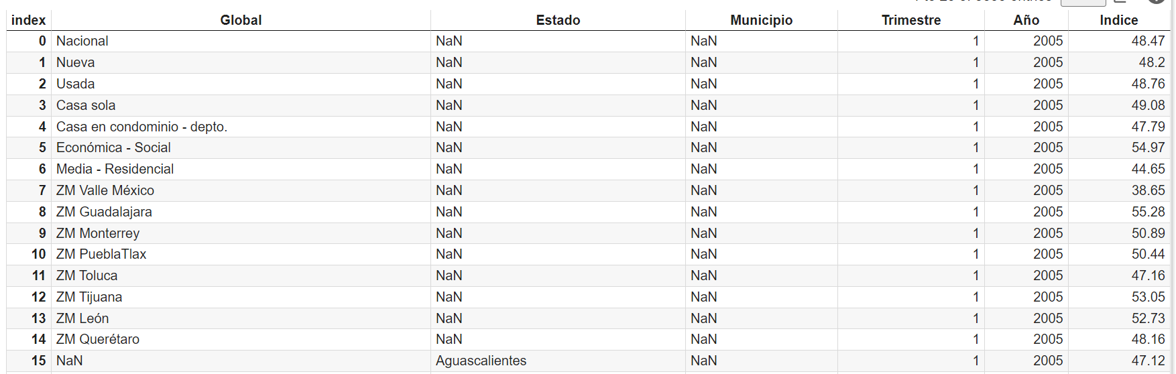

In [7]:
nacional_db = base.dropna(subset=['Global'])
# Nuevo Dataframe con la información a Nivel Nacional
# Se eliminan las columnan con valores "nulos": NaN

In [8]:
estado_bd = base.dropna(subset=['Estado'])
# Nuevo Dataframe con la información por Estados
# Se eliminan las columnan con valores "nulos": NaN

In [9]:
municipio = base.dropna(subset=['Municipio'])

In [10]:
nacional_db = nacional_db.drop(['Municipio', 'Estado'], axis=1)
# A la base con información a Nivel Nacional se eliminana las columnadas Municipio y Estado

In [11]:
estado_bd = estado_bd.drop(['Global'], axis=1)
# Base con información estado se elimina la columna "Global"

In [12]:
municipio = municipio.drop(['Global'], axis=1)

In [13]:
municipio

,Estado,Municipio,Trimestre,Año,Indice
47,Aguascalientes,Aguascalientes,1,2005,46.96
48,Aguascalientes,Jesús María,1,2005,46.96
49,Baja California,Mexicali,1,2005,50.95
50,Baja California,Tijuana,1,2005,53.10
51,Baja California Sur,La Paz,1,2005,50.54
...,...,...,...,...,...
8949,Veracruz,Veracruz,2,2023,159.13
8950,Yucatán,Kanasín,2,2023,157.71
8951,Yucatán,Mérida,2,2023,164.80
8952,Zacatecas,Guadalupe,2,2023,150.03


In [14]:
nacional_db

,Global,Trimestre,Año,Indice
0,Nacional,1,2005,48.47
1,Nueva,1,2005,48.20
2,Usada,1,2005,48.76
3,Casa sola,1,2005,49.08
4,Casa en condominio - depto.,1,2005,47.79
...,...,...,...,...
8843,ZM PueblaTlax,2,2023,158.53
8844,ZM Toluca,2,2023,147.83
8845,ZM Tijuana,2,2023,181.30
8846,ZM León,2,2023,159.75


In [15]:
nacional_db = nacional_db[nacional_db['Global']=='Nacional']

In [16]:
nacional_db = nacional_db.reindex(['Año','Trimestre', 'Global', 'Indice'], axis=1)
# Establecer un nuevo órden para las columnas

In [17]:
estado_bd = estado_bd.reindex(['Año', 'Trimestre','Estado','Municipio' , 'Indice'], axis=1)

In [18]:
municipio = municipio.reindex(['Año','Trimestre','Estado', 'Municipio', 'Indice'], axis=1)

In [19]:
municipio

,Año,Trimestre,Estado,Municipio,Indice
47,2005,1,Aguascalientes,Aguascalientes,46.96
48,2005,1,Aguascalientes,Jesús María,46.96
49,2005,1,Baja California,Mexicali,50.95
50,2005,1,Baja California,Tijuana,53.10
51,2005,1,Baja California Sur,La Paz,50.54
...,...,...,...,...,...
8949,2023,2,Veracruz,Veracruz,159.13
8950,2023,2,Yucatán,Kanasín,157.71
8951,2023,2,Yucatán,Mérida,164.80
8952,2023,2,Zacatecas,Guadalupe,150.03


In [20]:
nacional_db

,Año,Trimestre,Global,Indice
0,2005,1,Nacional,48.47
121,2005,2,Nacional,50.15
242,2005,3,Nacional,51.10
363,2005,4,Nacional,50.99
484,2006,1,Nacional,52.09
...,...,...,...,...
8349,2022,2,Nacional,144.72
8470,2022,3,Nacional,149.21
8591,2022,4,Nacional,152.66
8712,2023,1,Nacional,157.59


In [21]:
estado_bd

,Año,Trimestre,Estado,Municipio,Indice
15,2005,1,Aguascalientes,NaN,47.12
16,2005,1,Baja California,NaN,52.22
17,2005,1,Baja California Sur,NaN,50.81
18,2005,1,Campeche,NaN,48.68
19,2005,1,Coahuila,NaN,51.43
...,...,...,...,...,...
8949,2023,2,Veracruz,Veracruz,159.13
8950,2023,2,Yucatán,Kanasín,157.71
8951,2023,2,Yucatán,Mérida,164.80
8952,2023,2,Zacatecas,Guadalupe,150.03


In [22]:
nacional_db['Q'] = nacional_db['Trimestre'].astype(str) +"Q" + nacional_db['Año'].astype(str)
# Se crea nueva columna (denominada Q), la cual concatena la columna "Trimestre" y "Año"

In [23]:
estado_bd['Q'] = estado_bd['Trimestre'].astype(str) + "Q" + estado_bd['Año'].astype(str)

In [24]:
municipio['Q']= municipio['Trimestre'].astype(str) +"Q" +municipio['Año'].astype(str)

In [25]:
municipio.set_index('Q')

,Año,Trimestre,Estado,Municipio,Indice
Q,,,,,
1Q2005,2005,1,Aguascalientes,Aguascalientes,46.96
1Q2005,2005,1,Aguascalientes,Jesús María,46.96
1Q2005,2005,1,Baja California,Mexicali,50.95
1Q2005,2005,1,Baja California,Tijuana,53.10
1Q2005,2005,1,Baja California Sur,La Paz,50.54
...,...,...,...,...,...
2Q2023,2023,2,Veracruz,Veracruz,159.13
2Q2023,2023,2,Yucatán,Kanasín,157.71
2Q2023,2023,2,Yucatán,Mérida,164.80


In [26]:
nacional_db.set_index('Q')
# Se designa la columna "Q" como la columna índice del Dataframe

,Año,Trimestre,Global,Indice
Q,,,,
1Q2005,2005,1,Nacional,48.47
2Q2005,2005,2,Nacional,50.15
3Q2005,2005,3,Nacional,51.10
4Q2005,2005,4,Nacional,50.99
1Q2006,2006,1,Nacional,52.09
...,...,...,...,...
2Q2022,2022,2,Nacional,144.72
3Q2022,2022,3,Nacional,149.21
4Q2022,2022,4,Nacional,152.66


In [27]:
estado_bd.set_index('Q')

,Año,Trimestre,Estado,Municipio,Indice
Q,,,,,
1Q2005,2005,1,Aguascalientes,NaN,47.12
1Q2005,2005,1,Baja California,NaN,52.22
1Q2005,2005,1,Baja California Sur,NaN,50.81
1Q2005,2005,1,Campeche,NaN,48.68
1Q2005,2005,1,Coahuila,NaN,51.43
...,...,...,...,...,...
2Q2023,2023,2,Veracruz,Veracruz,159.13
2Q2023,2023,2,Yucatán,Kanasín,157.71
2Q2023,2023,2,Yucatán,Mérida,164.80


In [28]:
municipio['Municipio'].unique()

array(['Aguascalientes', 'Jesús María ', 'Mexicali', 'Tijuana', 'La Paz',
       'Los Cabos', 'Campeche', 'Carmen', 'Saltillo', 'Torreón',
       'Manzanillo', 'Villa de Álvarez', 'Tapachula', 'Tuxtla Gutiérrez',
       'Chihuahua', 'Juárez', 'Gustavo A. Madero', 'Iztapalapa',
       'Benito Juárez', 'Cuauhtémoc', 'Miguel Hidalgo', 'Durango',
       'Gómez Palacio', 'Celaya', 'León', 'Acapulco de Juárez',
       'Zihuatanejo de Azueta ', 'Mineral de la Reforma ', 'Tizayuca',
       'Guadalajara', 'Tlajomulco de Zúñiga', 'San Pedro Tlaquepaque ',
       'Zapopan', 'Metepec', 'Tecámac', 'Toluca', 'Zumpango ', 'Morelia',
       'Uruapan ', 'Emiliano Zapata', 'Temixco ', 'Tepic',
       'Bahía de Banderas ', 'Apodaca', 'García ', 'Monterrey',
       'San Juan Bautista Tuxtepec', 'Tlacolula de Matamoros ',
       'Huejotzingo ', 'Puebla', 'Corregidora', 'El Marqués ',
       'Querétaro', 'Solidaridad ', 'San Luis Potosí',
       'Soledad de Graciano Sánchez ', 'Culiacán', 'Mazatlán ', 'Caje

In [29]:
estado_bd = estado_bd.fillna(0)
estado_bd = estado_bd[estado_bd['Municipio']== 0]

In [30]:
estado_bd = estado_bd.sort_values(['Estado', 'Año', 'Trimestre'])
# Ordenar el Dataframe por: Estado - Año - Trimestre

In [31]:
estado_bd['%_Anual'] = (estado_bd['Indice']/estado_bd['Indice'].shift(4)-1)*100
# Para determinar la variación porcentual anual - se divide el último trimestre reportado entre el timestre correspondiente al año pasado

In [32]:
estado_bd

,Año,Trimestre,Estado,Municipio,Indice,Q,%_Anual
15,2005,1,Aguascalientes,0,47.12,1Q2005,NaN
136,2005,2,Aguascalientes,0,48.97,2Q2005,NaN
257,2005,3,Aguascalientes,0,50.25,3Q2005,NaN
378,2005,4,Aguascalientes,0,50.26,4Q2005,NaN
499,2006,1,Aguascalientes,0,51.04,1Q2006,8.319185
...,...,...,...,...,...,...,...
8395,2022,2,Zacatecas,0,136.29,2Q2022,5.105267
8516,2022,3,Zacatecas,0,140.69,3Q2022,8.056836
8637,2022,4,Zacatecas,0,144.64,4Q2022,10.911740
8758,2023,1,Zacatecas,0,148.37,1Q2023,11.707574


In [33]:
estado_bd=estado_bd[estado_bd['Año']> 2005]
# Para no considerar valores "nulos" se crea un nuevo Dataframe con los valores a partir de 2006

In [34]:
estado_bd = estado_bd.set_index('Q')

In [35]:
estado_bd

,Año,Trimestre,Estado,Municipio,Indice,%_Anual
Q,,,,,,
1Q2006,2006,1,Aguascalientes,0,51.04,8.319185
2Q2006,2006,2,Aguascalientes,0,52.67,7.555646
3Q2006,2006,3,Aguascalientes,0,53.63,6.726368
4Q2006,2006,4,Aguascalientes,0,53.82,7.083168
1Q2007,2007,1,Aguascalientes,0,54.19,6.171630
...,...,...,...,...,...,...
2Q2022,2022,2,Zacatecas,0,136.29,5.105267
3Q2022,2022,3,Zacatecas,0,140.69,8.056836
4Q2022,2022,4,Zacatecas,0,144.64,10.911740


In [36]:
t_min= estado_bd['%_Anual'].min()
t_max= estado_bd['%_Anual'].max()

In [37]:
(t_min,t_max)

(-1.534744919710096, 18.185777390655144)

In [38]:
D_Max = estado_bd['%_Anual'].argmax()
D_min = estado_bd['%_Anual'].argmin()

In [39]:
estado_bd.iloc[D_Max]

Año                         2023
Trimestre                      2
Estado       Baja California Sur
Municipio                      0
Indice                    189.96
%_Anual                18.185777
Name: 2Q2023, dtype: object

In [40]:
estado_bd.iloc[D_min]

Año                         2010
Trimestre                      2
Estado       Baja California Sur
Municipio                      0
Indice                     69.29
%_Anual                -1.534745
Name: 2Q2010, dtype: object

In [41]:
# Selección de tres estados para comparar:
estado_a =  'Baja California Sur'
estado_b = 'Ciudad de México'
estado_c = 'México'

In [42]:
# Para cada estado, se crea un DataFrame
indice_estado_a= estado_bd.loc[estado_bd.Estado==estado_a]

In [43]:
indice_estado_a

,Año,Trimestre,Estado,Municipio,Indice,%_Anual
Q,,,,,,
1Q2006,2006,1,Baja California Sur,0,54.89,8.029915
2Q2006,2006,2,Baja California Sur,0,56.81,7.962752
3Q2006,2006,3,Baja California Sur,0,58.40,9.179286
4Q2006,2006,4,Baja California Sur,0,59.11,9.972093
1Q2007,2007,1,Baja California Sur,0,60.70,10.584806
...,...,...,...,...,...,...
2Q2022,2022,2,Baja California Sur,0,160.73,13.038892
3Q2022,2022,3,Baja California Sur,0,167.92,14.966452
4Q2022,2022,4,Baja California Sur,0,174.29,16.465085


In [44]:
indice_estado_b= estado_bd.loc[estado_bd.Estado==estado_b]

In [45]:
indice_estado_b

,Año,Trimestre,Estado,Municipio,Indice,%_Anual
Q,,,,,,
1Q2006,2006,1,Ciudad de México,0,37.68,11.446318
2Q2006,2006,2,Ciudad de México,0,38.74,9.496891
3Q2006,2006,3,Ciudad de México,0,39.38,7.069059
4Q2006,2006,4,Ciudad de México,0,39.96,9.090909
1Q2007,2007,1,Ciudad de México,0,41.46,10.031847
...,...,...,...,...,...,...
2Q2022,2022,2,Ciudad de México,0,136.00,6.792305
3Q2022,2022,3,Ciudad de México,0,140.55,7.974188
4Q2022,2022,4,Ciudad de México,0,144.31,9.616407


In [46]:
indice_estado_c= estado_bd.loc[estado_bd.Estado==estado_c]

In [47]:
indice_estado_c

,Año,Trimestre,Estado,Municipio,Indice,%_Anual
Q,,,,,,
1Q2006,2006,1,México,0,51.77,9.775233
2Q2006,2006,2,México,0,53.04,6.058788
3Q2006,2006,3,México,0,53.55,4.549004
4Q2006,2006,4,México,0,53.69,5.047936
1Q2007,2007,1,México,0,54.64,5.543751
...,...,...,...,...,...,...
2Q2022,2022,2,México,0,136.51,5.641542
3Q2022,2022,3,México,0,139.41,6.566274
4Q2022,2022,4,México,0,140.34,6.093136


In [48]:
nacional_db['%_Anual'] = (nacional_db['Indice']/nacional_db['Indice'].shift(4)-1)*100

In [49]:
municipio['%_Anual'] = (municipio['Indice']/municipio['Indice'].shift(4)-1)*100

In [50]:
nacional_db=nacional_db[nacional_db['Año']> 2005]

In [51]:
nacional_db = nacional_db.set_index('Q')

In [52]:
municipio = municipio[municipio['Año']>2005]

In [53]:
municipio= municipio.set_index('Q')

In [54]:
nacional_db

,Año,Trimestre,Global,Indice,%_Anual
Q,,,,,
1Q2006,2006,1,Nacional,52.09,7.468537
2Q2006,2006,2,Nacional,53.45,6.580259
3Q2006,2006,3,Nacional,54.26,6.183953
4Q2006,2006,4,Nacional,54.54,6.962149
1Q2007,2007,1,Nacional,55.97,7.448647
...,...,...,...,...,...
2Q2022,2022,2,Nacional,144.72,7.967771
3Q2022,2022,3,Nacional,149.21,9.423585
4Q2022,2022,4,Nacional,152.66,10.407174


In [55]:
municipio

,Año,Trimestre,Estado,Municipio,Indice,%_Anual
Q,,,,,,
1Q2006,2006,1,Aguascalientes,Aguascalientes,50.91,-4.322496
1Q2006,2006,1,Aguascalientes,Jesús María,50.75,7.521186
1Q2006,2006,1,Baja California,Mexicali,54.85,4.476190
1Q2006,2006,1,Baja California,Tijuana,57.13,17.915377
1Q2006,2006,1,Baja California Sur,La Paz,54.57,7.189157
...,...,...,...,...,...,...
2Q2023,2023,2,Veracruz,Veracruz,159.13,2.936801
2Q2023,2023,2,Yucatán,Kanasín,157.71,8.332188
2Q2023,2023,2,Yucatán,Mérida,164.80,12.784013


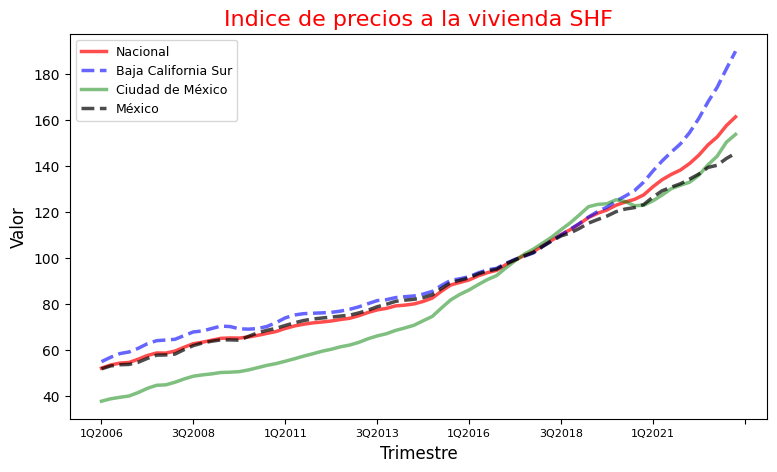

In [56]:
fig1, ax1=plt.subplots(figsize=(9,5))


nacional_db['Indice'].plot(ax=ax1, color='red',linestyle='-', linewidth='2.5', alpha=0.7)
indice_estado_a['Indice'].plot(ax=ax1,  color='blue',linestyle='--', linewidth='2.5', alpha=0.6)
indice_estado_b['Indice'].plot(ax=ax1, color='green',linestyle='-', linewidth='2.5', alpha=0.5)
indice_estado_c['Indice'].plot(ax=ax1, color='black',linestyle='--', linewidth='2.5', alpha=0.7)

plt.yticks(fontsize=10)
plt.xticks(fontsize=8)

ax1.set_title('Indice de precios a la vivienda SHF', fontsize= 16, color='red')
ax1.legend(['Nacional', estado_a, estado_b, estado_c], fontsize=9)

ax1.set_xlabel('Trimestre', fontsize= 12)
ax1.set_ylabel('Valor', fontsize= 12)

plt.show()

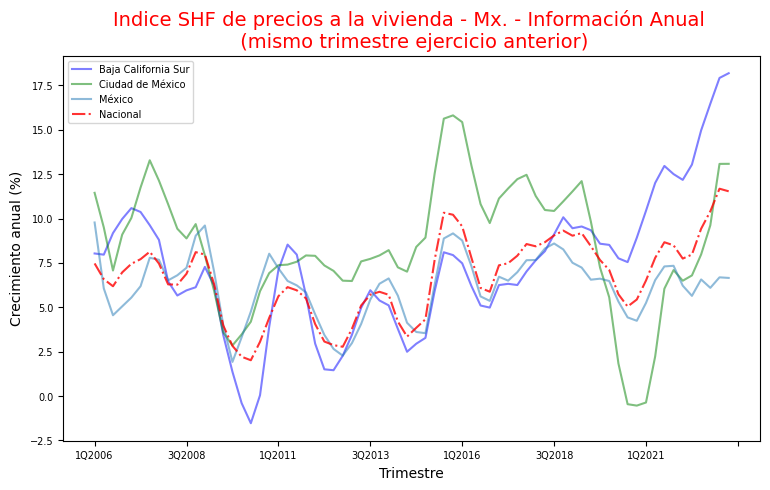

In [99]:
fig2, ax2=plt.subplots(figsize=(9,5))

edo_a = estado_bd[estado_bd['Estado']== estado_a]
edo_b = estado_bd[estado_bd['Estado']== estado_b]
edo_c = estado_bd[estado_bd['Estado']== estado_c]

edo_a['%_Anual'].plot(ax=ax2, color='blue',  alpha=0.5)
edo_b['%_Anual'].plot(ax=ax2, color='green',  alpha=0.5)
edo_c['%_Anual'].plot(ax=ax2, alpha=0.5)
nacional_db['%_Anual'].plot(ax=ax2, color='red', linestyle= 'dashdot', alpha=0.8)

ax2.set_title('Indice SHF de precios a la vivienda - Mx. - Información Anual \n (mismo trimestre ejercicio anterior)', fontsize= 14, color='red')
ax2.legend([estado_a, estado_b, estado_c, 'Nacional'], fontsize=7)

plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

ax2.set_xlabel('Trimestre', fontsize= 10)
ax2.set_ylabel('Crecimiento anual (%)', fontsize= 10)

plt.show()

#Información segundo trimestre 2023

In [58]:
nacional_db.to_excel("IndiceSHFNal.xlsx", sheet_name='Nacional')

In [59]:
nacional_2023 = nacional_db[(nacional_db['Año']>2021) & (nacional_db['Trimestre']<3)]
estado_2023 = estado_bd[(estado_bd['Año']>2021) & (estado_bd['Trimestre']<3)]
municipio_2023 =municipio[(municipio['Año']>2021) & (municipio['Trimestre']<3)]

In [60]:
nacional_2023

,Año,Trimestre,Global,Indice,%_Anual
Q,,,,,
1Q2022,2022,1,Nacional,141.11,7.742231
2Q2022,2022,2,Nacional,144.72,7.967771
1Q2023,2023,1,Nacional,157.59,11.678832
2Q2023,2023,2,Nacional,161.41,11.532615


In [61]:
# Paso 1: Obtener el valor del índice del primer semestre para 2023 y 2022
# En el ejemplo se crea una columna de ayuda "Promedio"
nacional_2023['Promedio'] = (nacional_2023.Indice + nacional_2023.Indice.shift(1))/2

<ipython-input-61-0cb2df730015>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nacional_2023['Promedio'] = (nacional_2023.Indice + nacional_2023.Indice.shift(1))/2


In [62]:
# Paso 2: Obtener el crecimiento comparando el valor del índice del prmer semestre 2023 vs 2022
nacional_2023['Semestre'] = (nacional_2023.Promedio / nacional_2023.Promedio.shift(2)-1)*100

<ipython-input-62-bdc1e0a592dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nacional_2023['Semestre'] = (nacional_2023.Promedio / nacional_2023.Promedio.shift(2)-1)*100


In [63]:
nacional_2023

,Año,Trimestre,Global,Indice,%_Anual,Promedio,Semestre
Q,,,,,,,
1Q2022,2022,1,Nacional,141.11,7.742231,NaN,NaN
2Q2022,2022,2,Nacional,144.72,7.967771,142.915,NaN
1Q2023,2023,1,Nacional,157.59,11.678832,151.155,NaN
2Q2023,2023,2,Nacional,161.41,11.532615,159.500,11.6048


In [64]:
# Paso 3: Eliminar la columna de ayuda promedio y los valores "Nan" únicamente se conserva el valor más reciente, el cual corresponde al crecimiento del primer semestre (2023 vs 2022)
nacional_2023 = nacional_2023.drop(['Promedio'], axis=1)

In [65]:
nacional_2023= nacional_2023.dropna(subset=['Semestre'])

In [66]:
# Paso 4: Mostrar los resultados
nacional_2023

,Año,Trimestre,Global,Indice,%_Anual,Semestre
Q,,,,,,
2Q2023,2023,2,Nacional,161.41,11.532615,11.6048


In [67]:
# Replicar los pasos anteriores para las base "Estados" y "Municipios"
estado_2023['Promedio'] = (estado_2023.Indice + estado_2023.Indice.shift(1))/2

<ipython-input-67-27d3c593166b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estado_2023['Promedio'] = (estado_2023.Indice + estado_2023.Indice.shift(1))/2


In [68]:
estado_2023['Semestre'] = (estado_2023.Promedio / estado_2023.Promedio.shift(2)-1)*100

<ipython-input-68-6a9e3bcd9ad4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estado_2023['Semestre'] = (estado_2023.Promedio / estado_2023.Promedio.shift(2)-1)*100


In [69]:
estado_2023 = estado_2023.drop(['Promedio'], axis=1)

In [70]:
estado_2023 = estado_2023.dropna(subset=['Semestre'])

In [71]:
estado_2023 = estado_2023[(estado_2023['Año']==2023) & (estado_2023['Trimestre']==2)]

In [72]:
estado_2023

,Año,Trimestre,Estado,Municipio,Indice,%_Anual,Semestre
Q,,,,,,,
2Q2023,2023,2,Aguascalientes,0,157.52,11.117381,11.379964
2Q2023,2023,2,Baja California,0,176.90,14.394723,14.886476
2Q2023,2023,2,Baja California Sur,0,189.96,18.185777,18.055247
2Q2023,2023,2,Campeche,0,170.48,12.106267,12.501669
2Q2023,2023,2,Chiapas,0,157.43,10.562540,10.561854
2Q2023,2023,2,Chihuahua,0,164.49,11.928416,11.546278
2Q2023,2023,2,Ciudad de México,0,153.79,13.080882,13.079039
2Q2023,2023,2,Coahuila,0,163.20,13.680691,13.728329
2Q2023,2023,2,Colima,0,164.09,11.663831,11.858621


In [73]:
estado_2023 = estado_2023.sort_values(['Semestre'], ascending=False)

In [74]:
estado_2023.to_excel("IndiceSHF.xlsx", sheet_name='Estado')

In [75]:
#Los 10 más altos
estado_2023[0:10]

,Año,Trimestre,Estado,Municipio,Indice,%_Anual,Semestre
Q,,,,,,,
2Q2023,2023,2,Baja California Sur,0,189.96,18.185777,18.055247
2Q2023,2023,2,Quintana Roo,0,188.31,16.463603,16.795001
2Q2023,2023,2,Sinaloa,0,180.37,15.392489,15.953079
2Q2023,2023,2,Baja California,0,176.90,14.394723,14.886476
2Q2023,2023,2,Guerrero,0,164.76,14.440508,14.845761
2Q2023,2023,2,Nayarit,0,181.90,14.604335,14.840468
2Q2023,2023,2,Coahuila,0,163.20,13.680691,13.728329
2Q2023,2023,2,Querétaro,0,161.50,14.118146,13.524048
2Q2023,2023,2,Ciudad de México,0,153.79,13.080882,13.079039


In [76]:
#Los 10 más bajos
estado_2023[-10:]

,Año,Trimestre,Estado,Municipio,Indice,%_Anual,Semestre
Q,,,,,,,
2Q2023,2023,2,Chiapas,0,157.43,10.562540,10.561854
2Q2023,2023,2,Hidalgo,0,148.29,9.738770,10.102484
2Q2023,2023,2,Oaxaca,0,151.96,9.017864,9.114951
2Q2023,2023,2,Guanajuato,0,157.05,8.828217,9.029409
2Q2023,2023,2,Morelos,0,156.57,8.804726,8.908803
2Q2023,2023,2,Tlaxcala,0,144.48,7.388137,8.445997
2Q2023,2023,2,San Luis Potosí,0,159.78,7.726537,7.704370
2Q2023,2023,2,Puebla,0,158.12,6.744076,7.118957
2Q2023,2023,2,Durango,0,145.40,7.695726,7.053648


In [77]:
municipio_2023 = municipio_2023.sort_values(['Estado','Municipio','Año', 'Trimestre'] )

In [78]:
municipio_2023

,Año,Trimestre,Estado,Municipio,Indice,%_Anual
Q,,,,,,
1Q2022,2022,1,Aguascalientes,Aguascalientes,138.39,1.563188
2Q2022,2022,2,Aguascalientes,Aguascalientes,142.19,1.877194
1Q2023,2023,1,Aguascalientes,Aguascalientes,154.75,2.885446
2Q2023,2023,2,Aguascalientes,Aguascalientes,158.20,2.421339
1Q2022,2022,1,Aguascalientes,Jesús María,138.58,-1.408651
...,...,...,...,...,...,...
2Q2023,2023,2,Zacatecas,Guadalupe,150.03,-2.438549
1Q2022,2022,1,Zacatecas,Zacatecas,132.94,-4.469675
2Q2022,2022,2,Zacatecas,Zacatecas,136.54,-4.504126


In [79]:
municipio_2023['Promedio'] = (municipio_2023.Indice + municipio_2023.Indice.shift(1))/2

In [80]:
municipio_2023['Semestre'] = (municipio_2023.Promedio / municipio_2023.Promedio.shift(2)-1)*100

In [81]:
municipio_2023 = municipio_2023.drop(['Promedio'], axis=1)

In [82]:
municipio_2023 = municipio_2023.dropna(subset=['Semestre'])

In [83]:
municipio_2023 = municipio_2023[(municipio_2023['Año']==2023) & (municipio_2023['Trimestre']==2)]

In [84]:
municipio_2023 = municipio_2023.sort_values(['Semestre'], ascending=False)

In [85]:
municipio_2023[0:3]

,Año,Trimestre,Estado,Municipio,Indice,%_Anual,Semestre
Q,,,,,,,
2Q2023,2023,2,Baja California Sur,La Paz,189.81,19.981037,18.327074
2Q2023,2023,2,Baja California Sur,Los Cabos,191.63,21.948581,17.701221
2Q2023,2023,2,Quintana Roo,Benito Juárez,189.47,19.336147,16.967736


In [86]:
municipio_2023[-3:]

,Año,Trimestre,Estado,Municipio,Indice,%_Anual,Semestre
Q,,,,,,,
2Q2023,2023,2,México,Zumpango,142.90,-20.073830,6.813394
2Q2023,2023,2,Durango,Gómez Palacio,142.49,-9.725038,6.760243
2Q2023,2023,2,México,Metepec,147.96,-16.839029,6.199812


In [87]:
estado_2023.tail(5)

,Año,Trimestre,Estado,Municipio,Indice,%_Anual,Semestre
Q,,,,,,,
2Q2023,2023,2,Tlaxcala,0,144.48,7.388137,8.445997
2Q2023,2023,2,San Luis Potosí,0,159.78,7.726537,7.704370
2Q2023,2023,2,Puebla,0,158.12,6.744076,7.118957
2Q2023,2023,2,Durango,0,145.40,7.695726,7.053648
2Q2023,2023,2,México,0,145.59,6.651527,6.668390


In [88]:
df1 = estado_2023.tail(5)

In [89]:
df1 = df1.sort_values(['Semestre'])

In [90]:
df2= estado_2023.head(5)

In [91]:
df2 = df2.sort_values(['Semestre'], ascending=True)

In [92]:
df3 = pd.concat([df1, nacional_2023, df2], axis=0)

In [93]:
df3

,Año,Trimestre,Estado,Municipio,Indice,%_Anual,Semestre,Global
Q,,,,,,,,
2Q2023,2023,2,México,0,145.59,6.651527,6.668390,NaN
2Q2023,2023,2,Durango,0,145.40,7.695726,7.053648,NaN
2Q2023,2023,2,Puebla,0,158.12,6.744076,7.118957,NaN
2Q2023,2023,2,San Luis Potosí,0,159.78,7.726537,7.704370,NaN
2Q2023,2023,2,Tlaxcala,0,144.48,7.388137,8.445997,NaN
2Q2023,2023,2,NaN,NaN,161.41,11.532615,11.604800,Nacional
2Q2023,2023,2,Guerrero,0,164.76,14.440508,14.845761,NaN
2Q2023,2023,2,Baja California,0,176.90,14.394723,14.886476,NaN
2Q2023,2023,2,Sinaloa,0,180.37,15.392489,15.953079,NaN


In [94]:
df3=df3.fillna('Nacional')

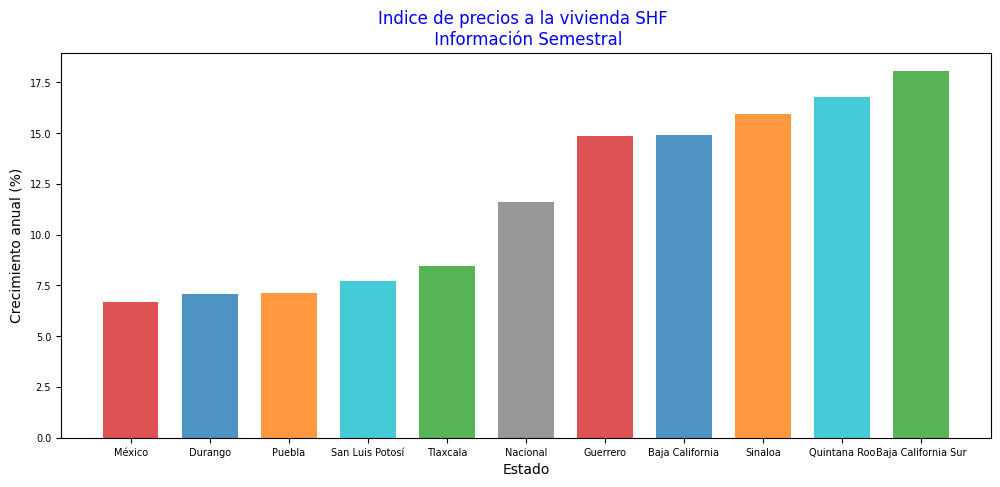

In [95]:
fig3, ax3=plt.subplots(figsize=(12,5))

x = df3['Estado']
y= df3['Semestre']

bar_colors = ['tab:red', 'tab:blue', 'tab:orange', 'tab:cyan', 'tab:green', 'tab:gray']

ax3.bar(x,y, color= bar_colors, width= 0.7, alpha=0.8,)

#ax3.scatter(x,y, color='r', marker='*')

ax3.set_xlabel('Estado', fontsize= 10)
ax3.set_ylabel('Crecimiento anual (%)', fontsize= 10)
ax3.set_title('Indice de precios a la vivienda SHF \n Información Semestral', fontsize= 12, color='blue')


plt.yticks(fontsize=7)
plt.xticks(fontsize=7)

plt.show()

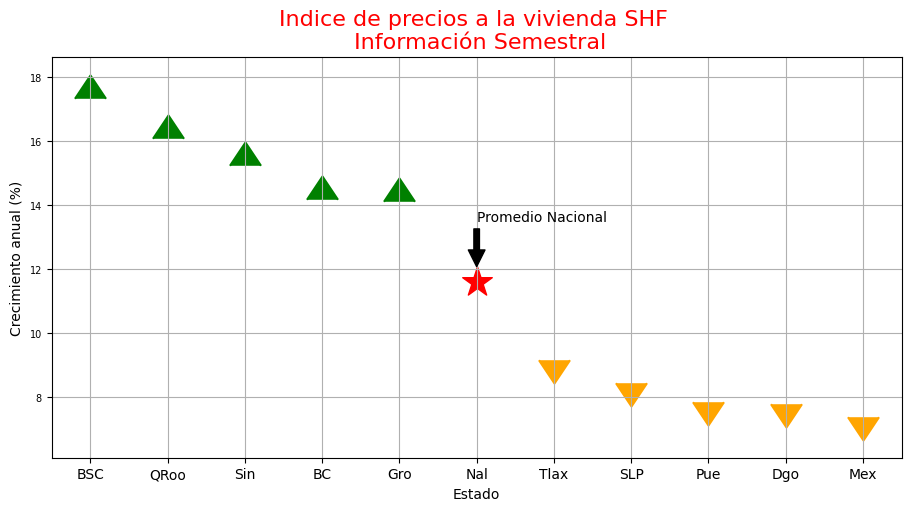

In [96]:
fig4, ax4=plt.subplots(figsize=(9,5),  layout='constrained')

edo1 = [estado_2023[estado_2023['Estado']== "Baja California Sur"]['Semestre']]
edo2 = [estado_2023[estado_2023['Estado']== "Quintana Roo"]['Semestre']]
edo3 = [estado_2023[estado_2023['Estado']== "Sinaloa"]['Semestre']]
edo4 = [estado_2023[estado_2023['Estado']== "Baja California"]['Semestre']]
edo5 = [estado_2023[estado_2023['Estado']== "Guerrero"]['Semestre']]
edo6 = [estado_2023[estado_2023['Estado']== "Tlaxcala"]['Semestre']]
edo7 = [estado_2023[estado_2023['Estado']== "San Luis Potosí"]['Semestre']]
edo8 = [estado_2023[estado_2023['Estado']== "Puebla"]['Semestre']]
edo9 = [estado_2023[estado_2023['Estado']== "Durango"]['Semestre']]
edo10 = [estado_2023[estado_2023['Estado']== "México"]['Semestre']]

nacional = nacional_2023['Semestre']

estados_top = ['BSC','QRoo', 'Sin', 'BC', 'Gro']
estados_btn = ['Tlax', 'SLP', 'Pue', 'Dgo', 'Mex']
indice_top = [edo1, edo2, edo3, edo4, edo5]
indice_btn = [edo6, edo7, edo8, edo9, edo10]

ax4.scatter(estados_top, indice_top, c='green', s= 500, marker=6)
ax4.scatter('Nal', nacional, s=500,c='red', marker='*')
ax4.scatter(estados_btn,indice_btn, c='orange', s= 500, marker=7)

ax4.set_title('Indice de precios a la vivienda SHF \n Información Semestral', fontsize= 16, color='red')

ax4.annotate('Promedio Nacional', xy=('Nal',12),xytext=('Nal', 13.5),arrowprops=dict(facecolor='black', shrink=0.05))

ax4.grid()

plt.yticks(fontsize=7)
plt.xticks(fontsize=10)

ax4.set_xlabel('Estado', fontsize= 10)
ax4.set_ylabel('Crecimiento anual (%)', fontsize= 10)

plt.show()